In [16]:
%matplotlib inline

In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [18]:
baseline = pd.read_csv("build/benchmarks/results/baseline.csv")
mean_baseline = np.median(baseline.time_ns) / np.median(baseline.iterations)

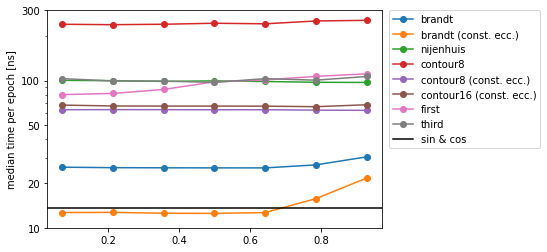

In [30]:
for name in ["brandt", "brandt_fixed", "nijenhuis", "contour8", "contour8_fixed", "contour16_fixed", "first", "third"]:
    df = pd.read_csv(f"build/benchmarks/results/{name}.csv")
    df_ecc = df.mean(level=0)
    plt.plot(df_ecc.eccentricity, df_ecc.time_ns.astype(np.float64) / df_ecc.iterations, "o-", label=name.replace("_fixed", " (const. ecc.)"))
    
plt.axhline(mean_baseline, color="k", label="sin & cos")
plt.yscale("log")
plt.ylim(10, 300)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)
plt.ylabel("median time per epoch [ns]")

plt.yticks([10, 20, 100, 50, 300])
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.savefig("comparison.pdf", bbox_inches="tight")

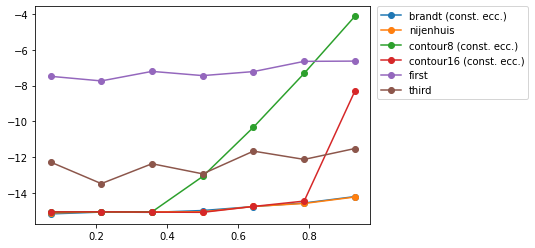

In [29]:
for name in ["brandt_fixed", "nijenhuis", "contour8_fixed", "contour16_fixed", "first", "third"]:
    df = pd.read_csv(f"build/benchmarks/results/{name}.csv")
    df_ecc = df.max(level=0)
    plt.plot(df_ecc.eccentricity, np.log10(df_ecc.error_sin), "o-", label=name.replace("_fixed", " (const. ecc.)"))
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)